# Diabetes Prediction Project

### Check the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes_dataset__2019.csv")

In [3]:
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [5]:
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

### clear

In [6]:
df["Diabetic"].loc[df["Diabetic"].isna()]

113    NaN
Name: Diabetic, dtype: object

In [7]:
df = df.drop(index=113)

In [8]:
df.Pregancies.unique()

array([ 0.,  1.,  2.,  3.,  4., nan])

In [9]:
mode_value = df['Pregancies'].mode()[0]
df['Pregancies'] = df['Pregancies'].fillna(mode_value) 

mode_value = df['Pdiabetes'].mode()[0]
df['Pdiabetes'] = df['Pdiabetes'].fillna(mode_value) 

mode_value = df['BMI'].mode()[0]
df['BMI'] = df['BMI'].fillna(mode_value) 

In [10]:
df.rename(columns={'Pregancies': 'Pregnancies'}, inplace=True)

In [11]:
df.describe()

,BMI,Sleep,SoundSleep,Pregnancies
count,951.000000,951.000000,951.000000,951.000000
mean,25.758149,6.949527,5.495268,0.370137
std,5.394966,1.273858,1.866528,0.893080
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,24.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [12]:
df.describe(include="O")

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,Smoking,Alcohol,RegularMedicine,JunkFood,Stress,BPLevel,Pdiabetes,UriationFreq,Diabetic
count,951,951,951,951,951,951,951,951,951,951,951,951,951,951
unique,4,2,2,2,4,2,2,3,4,4,6,3,2,3
top,less than 40,Male,no,no,less than half an hr,no,no,no,occasionally,sometimes,normal,0,not much,no
freq,487,580,498,723,336,843,759,614,671,564,706,936,663,684


In [13]:
df.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregnancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [14]:
columns_lst = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregnancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic']
for column in columns_lst:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Age': ['50-59' '40-49' 'less than 40' '60 or older']
Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Family_Diabetes': ['no' 'yes']
Unique values in column 'highBP': ['yes' 'no']
Unique values in column 'PhysicallyActive': ['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
Unique values in column 'BMI': [39. 28. 24. 23. 27. 21. 20. 26. 22. 15. 34. 30. 29. 18. 32. 31. 36. 38.
 40. 35. 19. 33. 17. 25. 42. 45.]
Unique values in column 'Smoking': ['no' 'yes']
Unique values in column 'Alcohol': ['no' 'yes']
Unique values in column 'Sleep': [ 8  6 10  7 11  9  4  5]
Unique values in column 'SoundSleep': [ 6  8 10  7 11  4  9  5  3  2  1  0]
Unique values in column 'RegularMedicine': ['no' 'yes' 'o']
Unique values in column 'JunkFood': ['occasionally' 'very often' 'often' 'always']
Unique values in column 'Stress': ['sometimes' 'not at all' 'very often' 'always']
Unique values in column 'BPLevel': ['high' 'normal' 'low

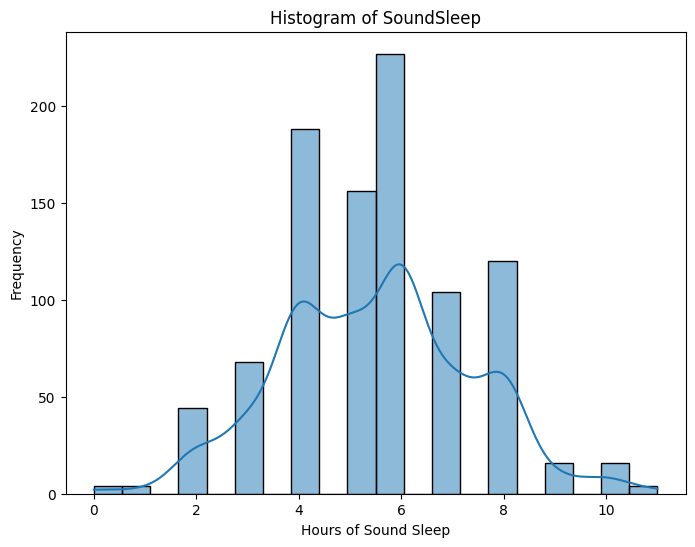

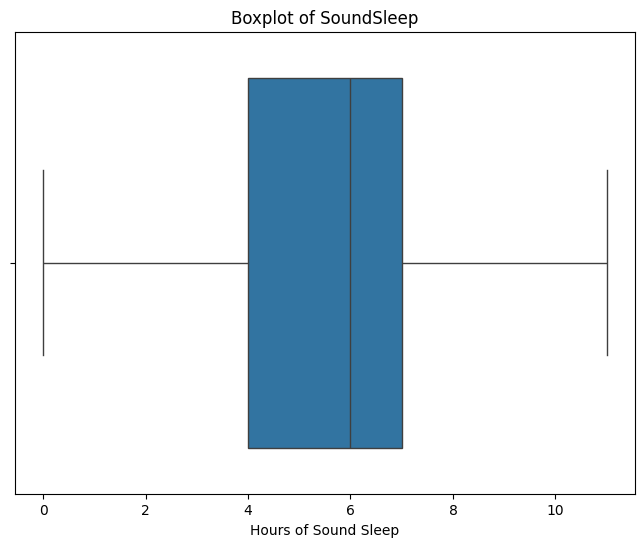

Mean SoundSleep: 5.495268138801261
Median SoundSleep: 6.0
Standard Deviation SoundSleep: 1.8665275123452327


In [15]:
sound_sleep_column = df['SoundSleep']

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(sound_sleep_column, bins=20, kde=True)
plt.title('Histogram of SoundSleep')
plt.xlabel('Hours of Sound Sleep')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=sound_sleep_column)
plt.title('Boxplot of SoundSleep')
plt.xlabel('Hours of Sound Sleep')
plt.show()

# Calculate summary statistics
mean_sound_sleep = sound_sleep_column.mean()
median_sound_sleep = sound_sleep_column.median()
std_dev_sound_sleep = sound_sleep_column.std()

print(f"Mean SoundSleep: {mean_sound_sleep}")
print(f"Median SoundSleep: {median_sound_sleep}")
print(f"Standard Deviation SoundSleep: {std_dev_sound_sleep}")


In [16]:
df.loc[df["SoundSleep"]==11]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UriationFreq,Diabetic
18,40-49,Male,yes,no,one hr or more,24.0,no,no,11,11,no,occasionally,sometimes,normal,0.0,0,not much,no
256,40-49,Male,yes,no,one hr or more,24.0,no,no,11,11,no,occasionally,sometimes,normal,0.0,0,not much,no
494,40-49,Male,yes,no,one hr or more,24.0,no,no,11,11,no,occasionally,sometimes,normal,0.0,0,not much,no
732,40-49,Male,yes,no,one hr or more,24.0,no,no,11,11,no,occasionally,sometimes,normal,0.0,0,not much,no


In [17]:
df["RegularMedicine"] = df["RegularMedicine"].str.replace('no','0')
df["RegularMedicine"] = df["RegularMedicine"].str.replace('o','0')
df["RegularMedicine"] = df["RegularMedicine"].str.replace('0','no')
df["Pdiabetes"] = df["Pdiabetes"].str.replace('0','no')
df["Diabetic"] = df["Diabetic"].str.replace(' no','no')
df["BPLevel"] = df["BPLevel"].str.replace('Low','low')
df["BPLevel"] = df["BPLevel"].str.replace('High','high')
df["BPLevel"] = df["BPLevel"].str.replace('normal ','normal')

### visualize the columns

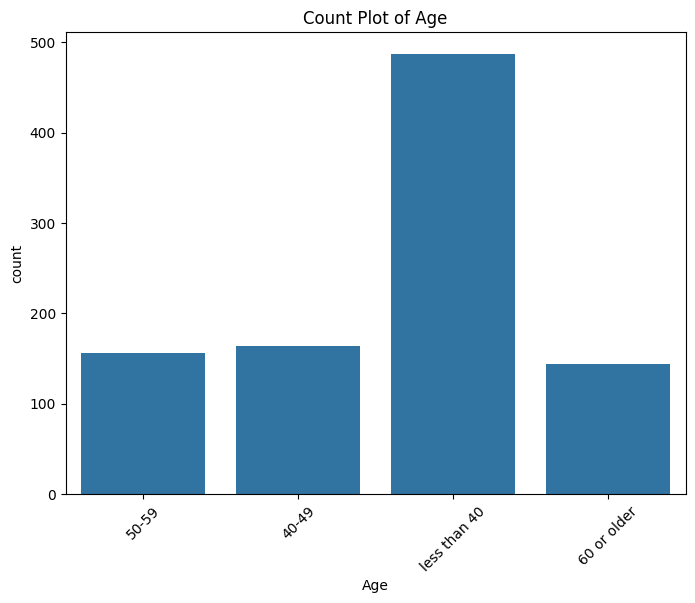

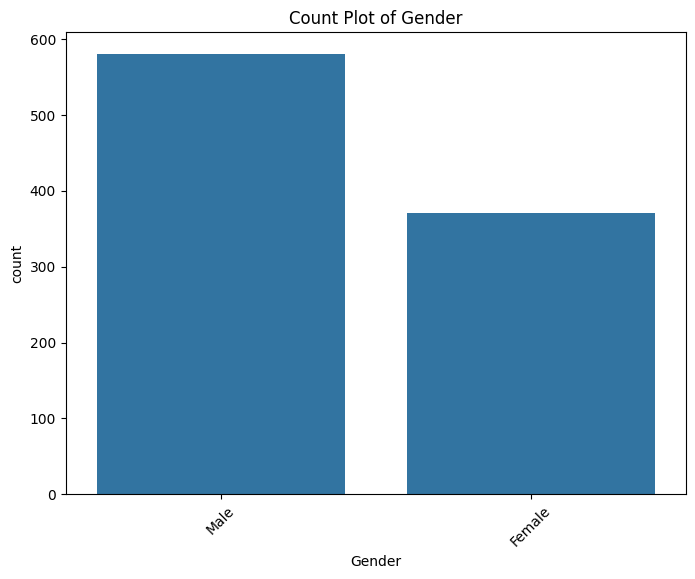

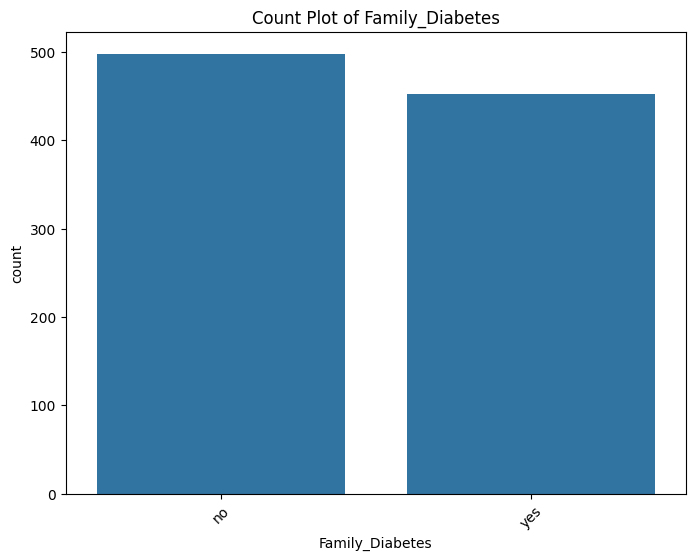

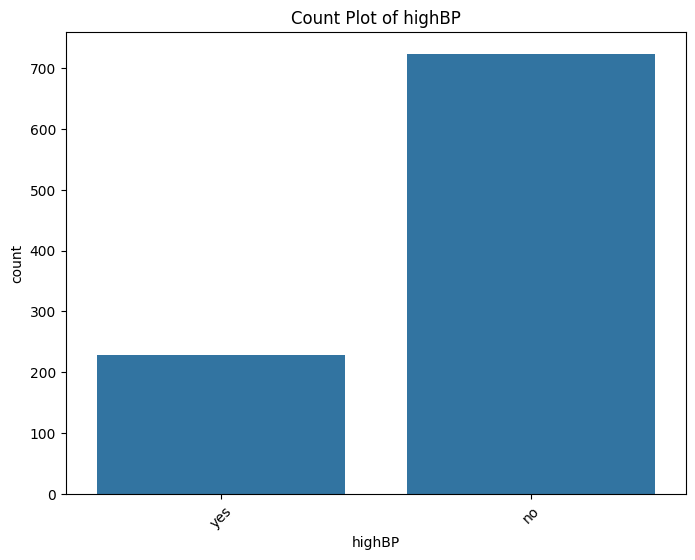

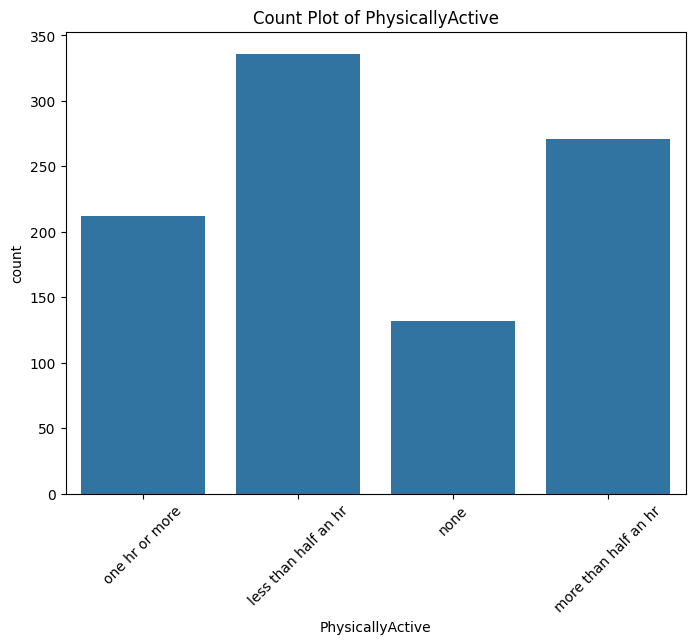

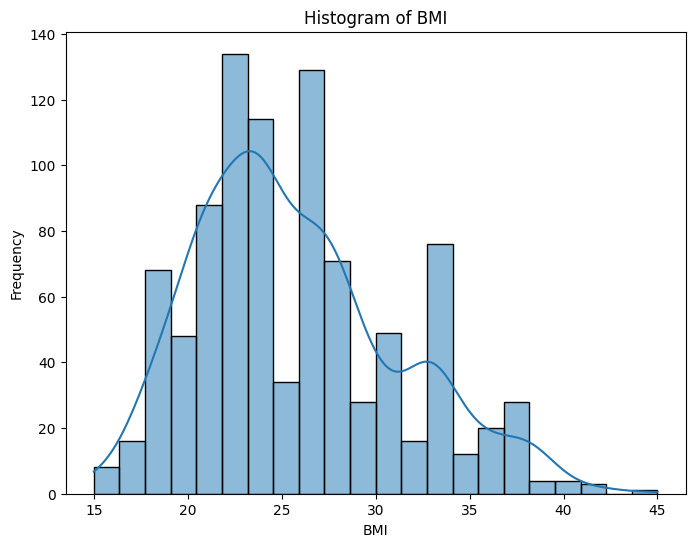

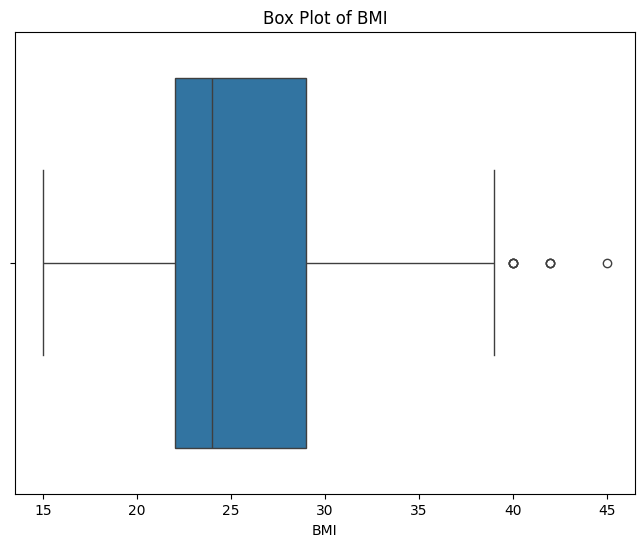

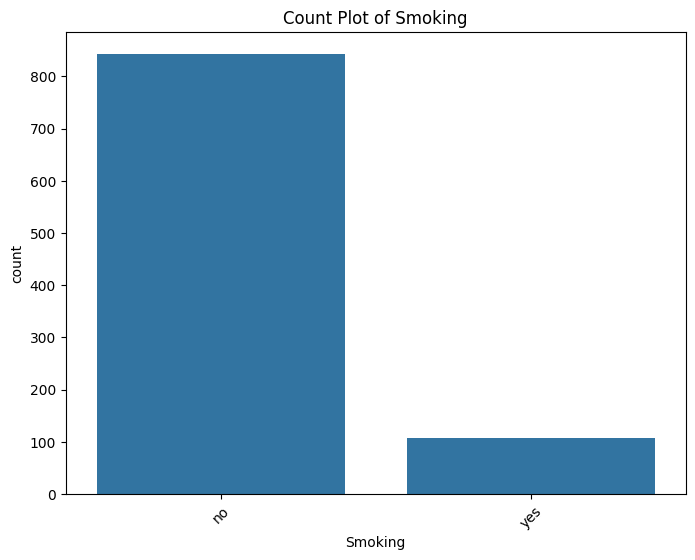

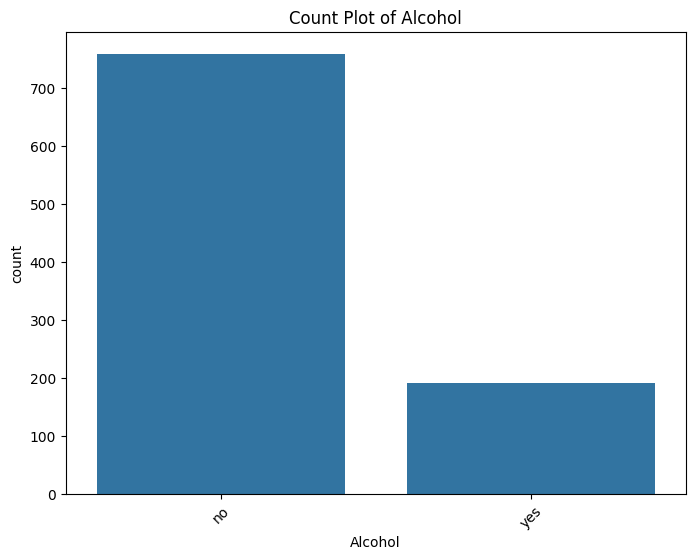

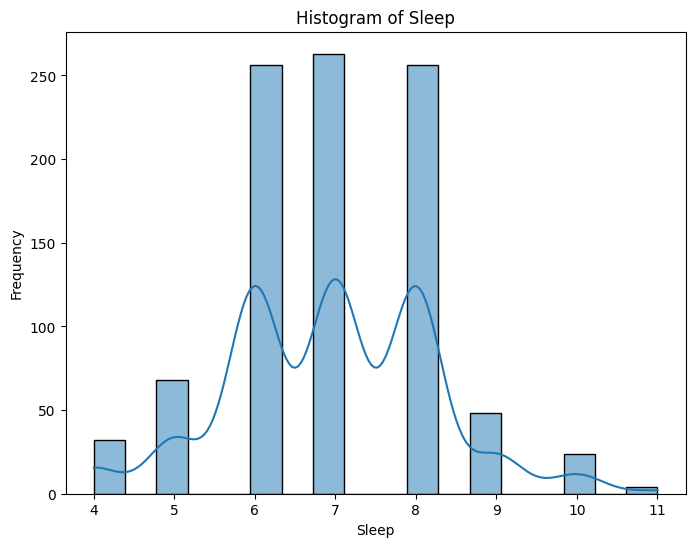

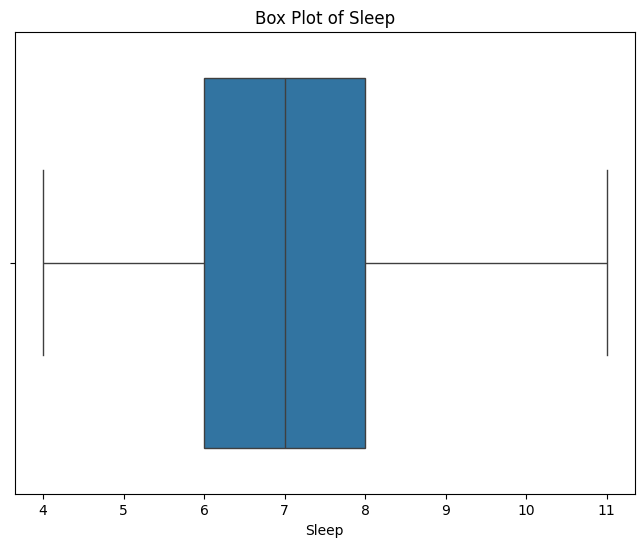

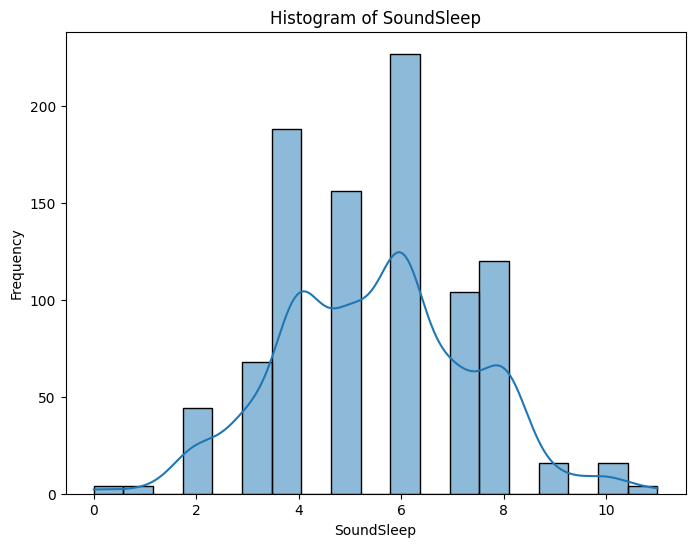

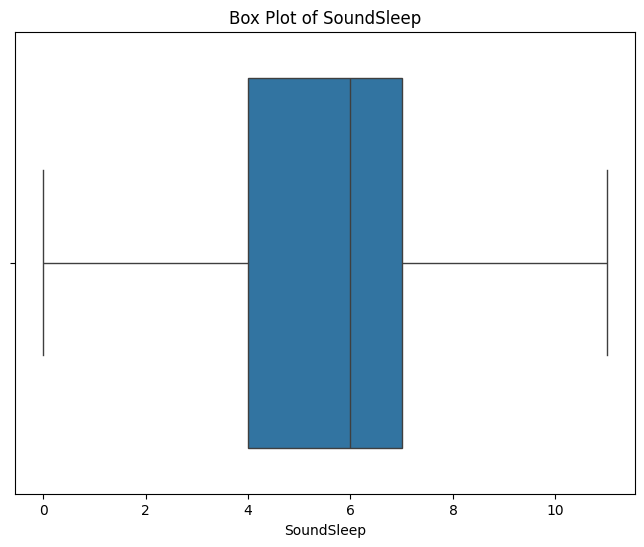

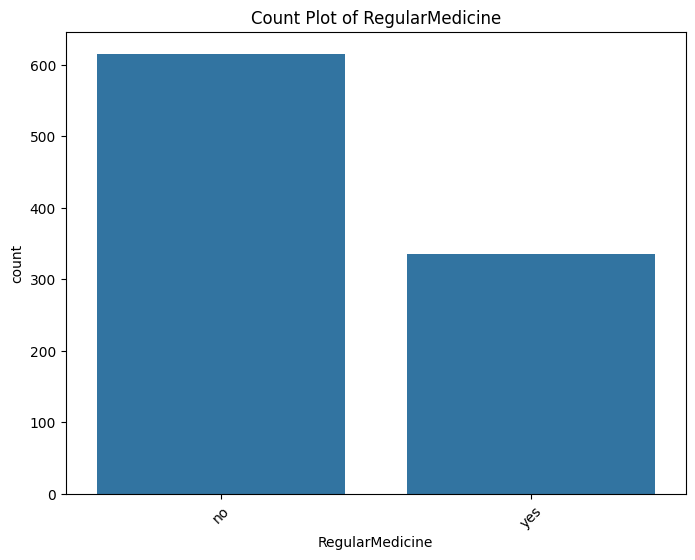

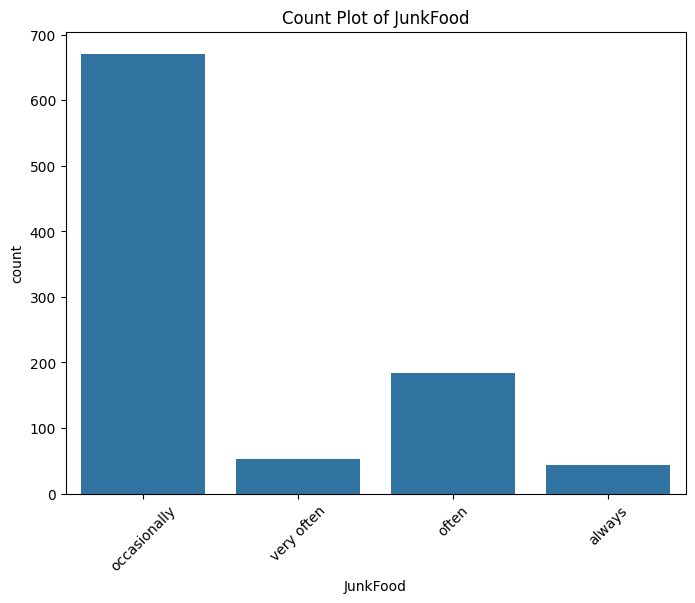

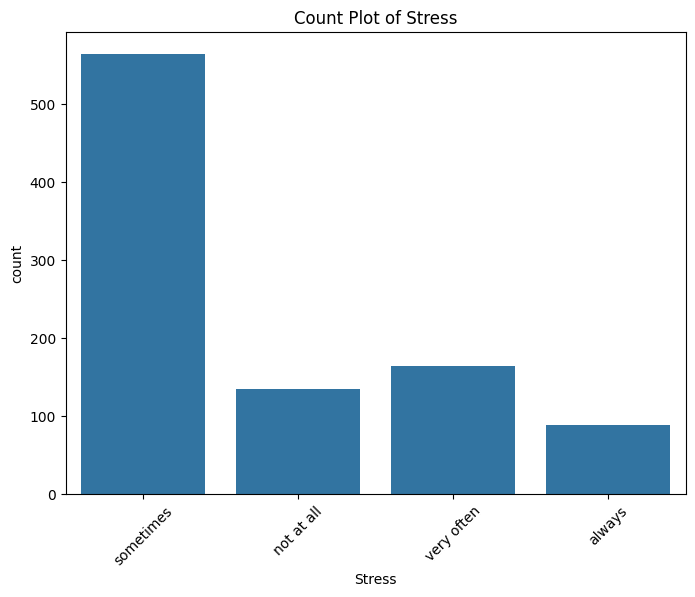

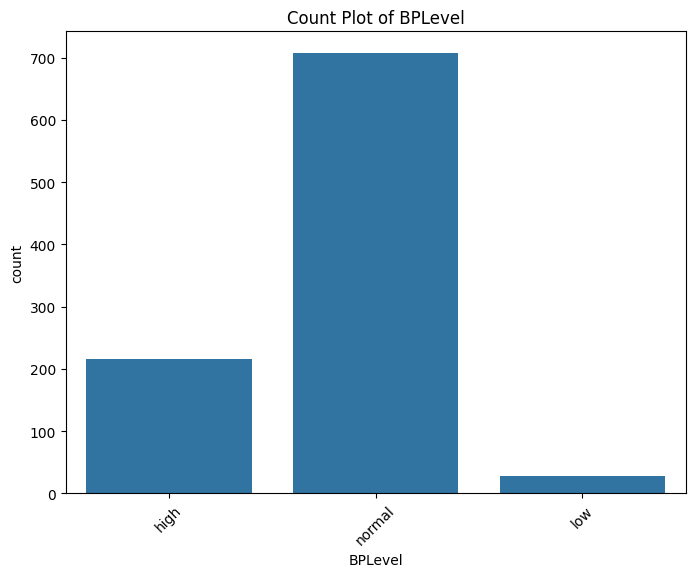

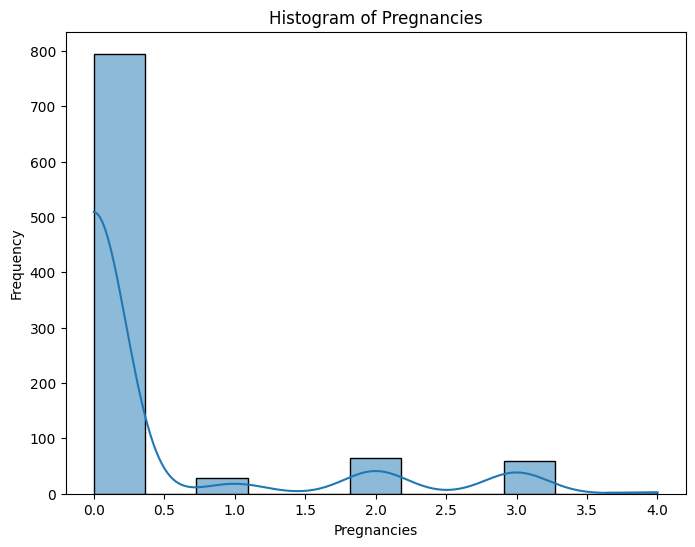

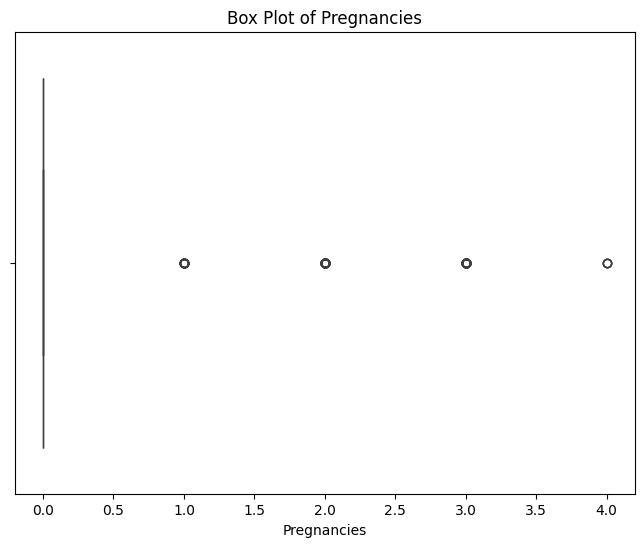

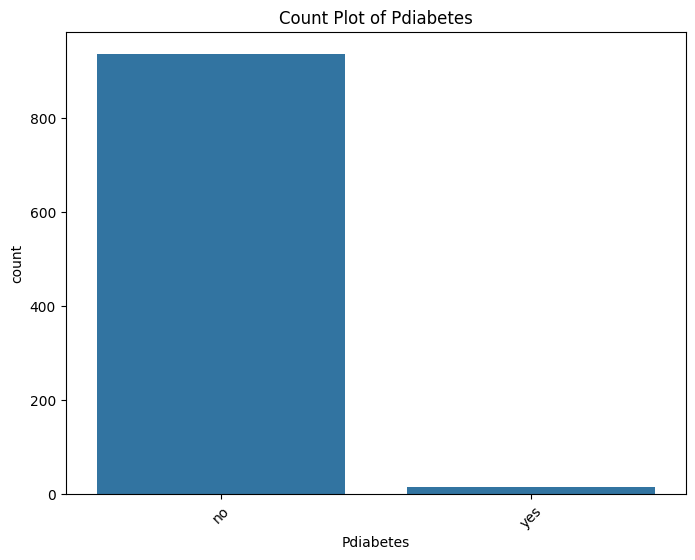

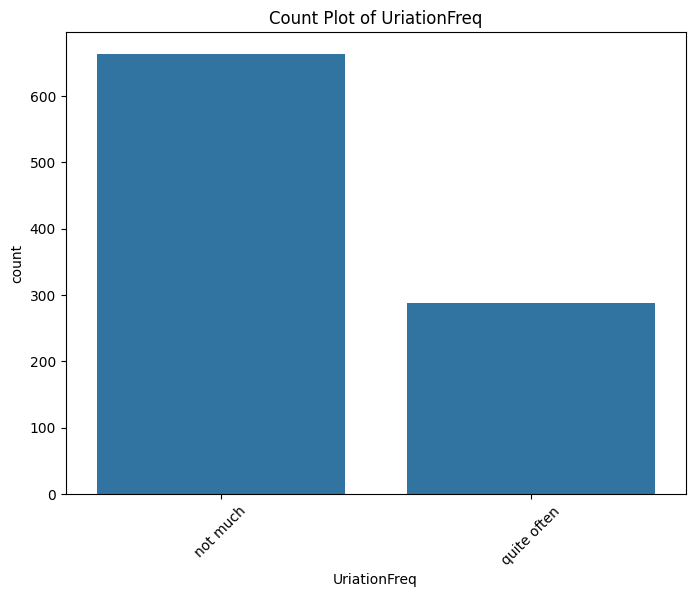

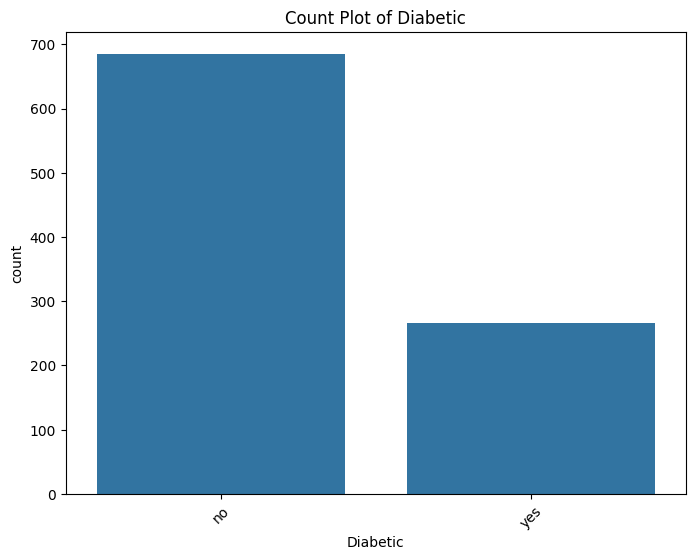

In [18]:
for column in columns_lst:
    if df[column].dtype == 'object':
        # Categorical column: Create a count plot
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df)
        plt.title(f'Count Plot of {column}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        # Numerical column: Create a histogram and a box plot
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()


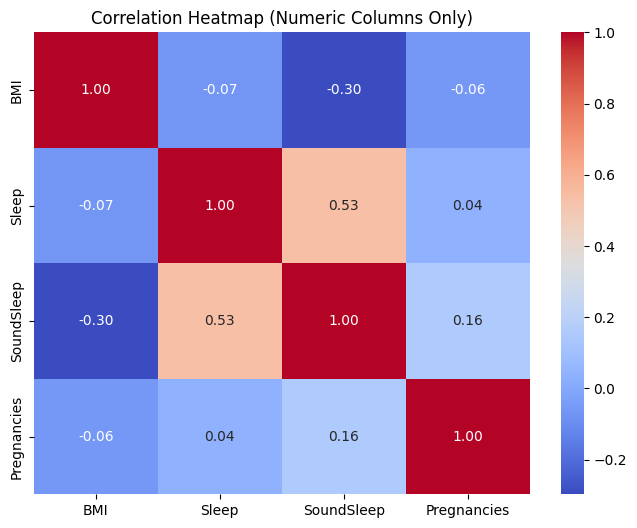

In [19]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

df_numeric = df.drop(columns=non_numeric_columns)

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


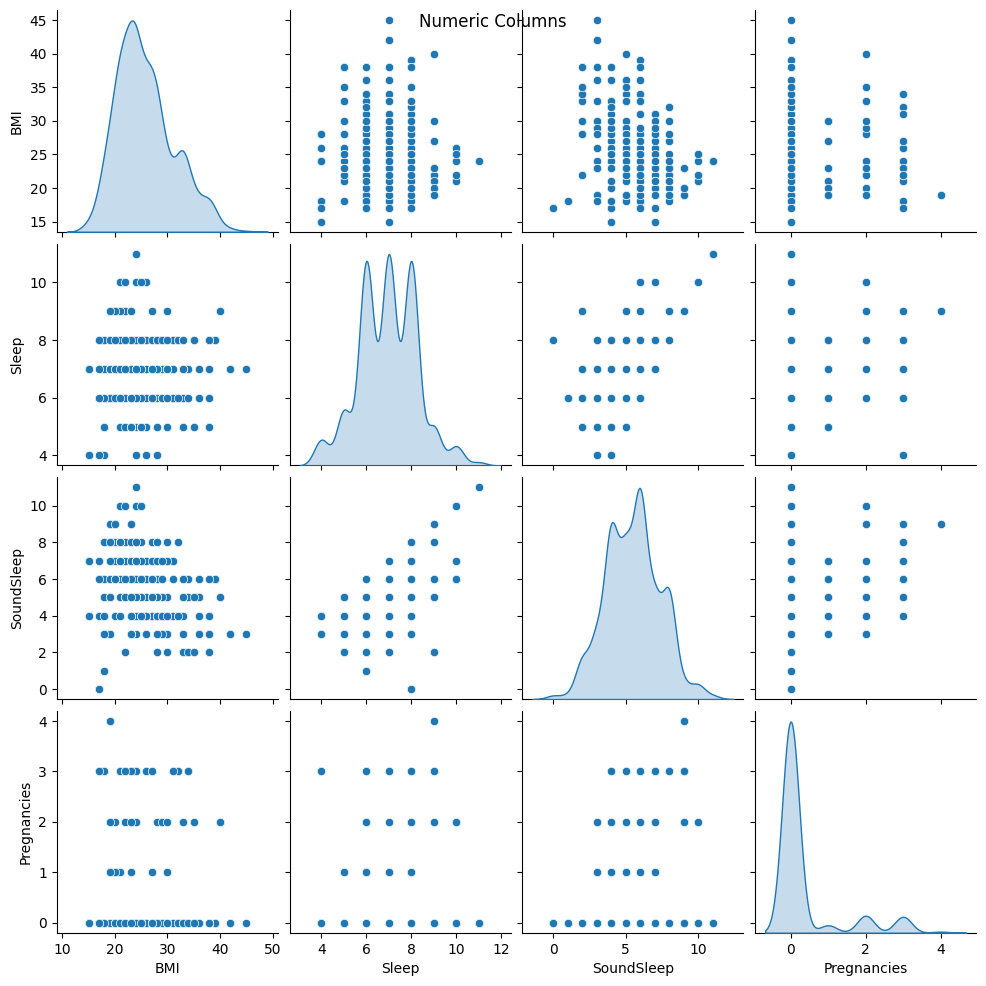

In [20]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Pairplot
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.suptitle('Numeric Columns')
plt.show()



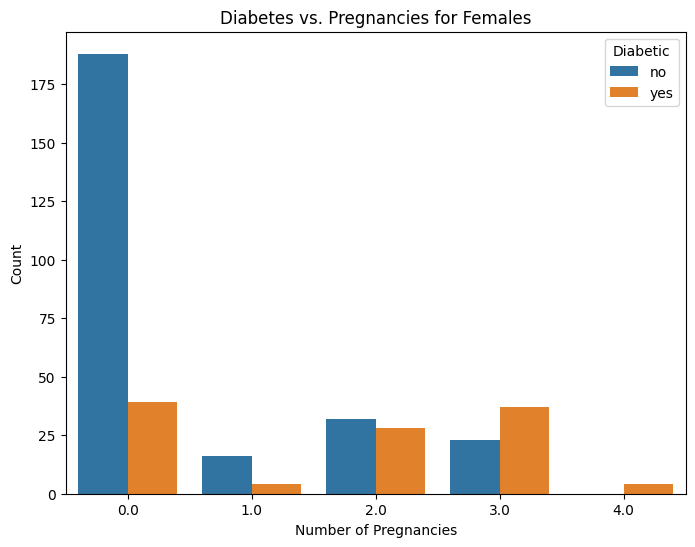

In [77]:
female_df = df[df['Gender'] == 'Female']

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', hue='Diabetic', data=female_df)
plt.title('Diabetes vs. Pregnancies for Females')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Diabetic', loc='upper right')
plt.show()

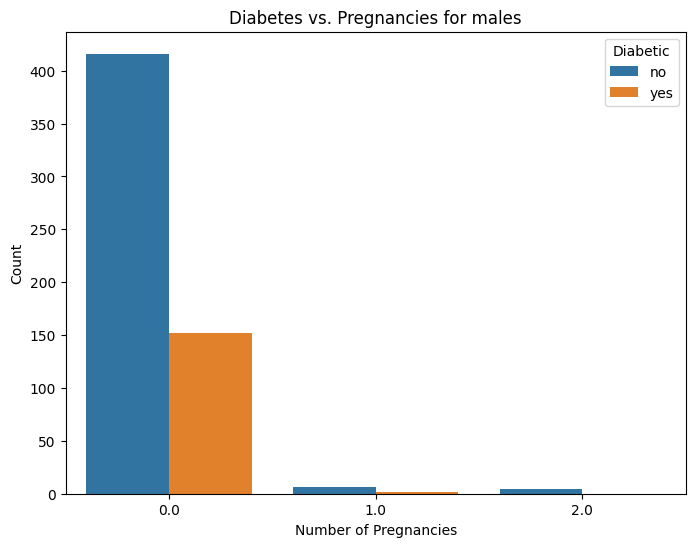

In [21]:
male_df = df[df['Gender'] == 'Male']

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', hue='Diabetic', data=male_df)
plt.title('Diabetes vs. Pregnancies for males')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Diabetic', loc='upper right')
plt.show()

In [24]:
# remove the male pregnancies
df.loc[(df["Gender"]=="Male") & df["Pregnancies"]==1]
df.loc[(df["Gender"] == "Male") & (df["Pregnancies"] == 1), "Gender"] = "Female"

In [26]:
# remove the male who got 2 pregnancies
df.loc[(df["Gender"]=="Male") & df["Pregnancies"]==1]
df.loc[(df["Gender"] == "Male") & (df["Pregnancies"] == 2), "Gender"] = "Female"

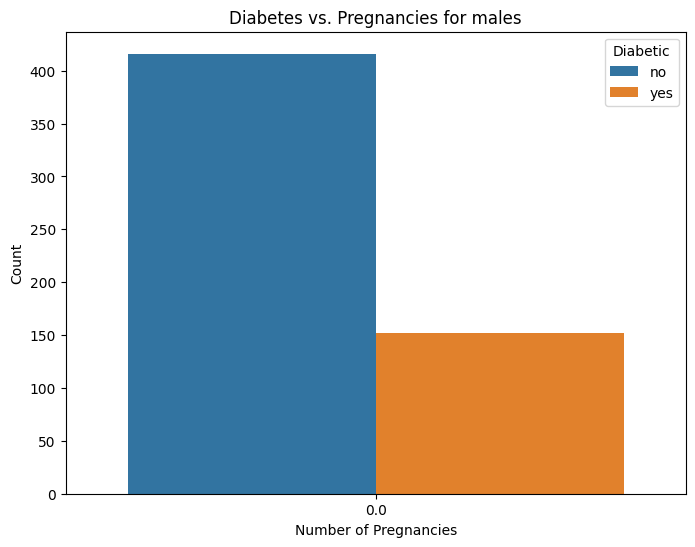

In [30]:
male_df = df[df['Gender'] == 'Male']

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', hue='Diabetic', data=male_df)
plt.title('Diabetes vs. Pregnancies for males')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Diabetic', loc='upper right')
plt.show()

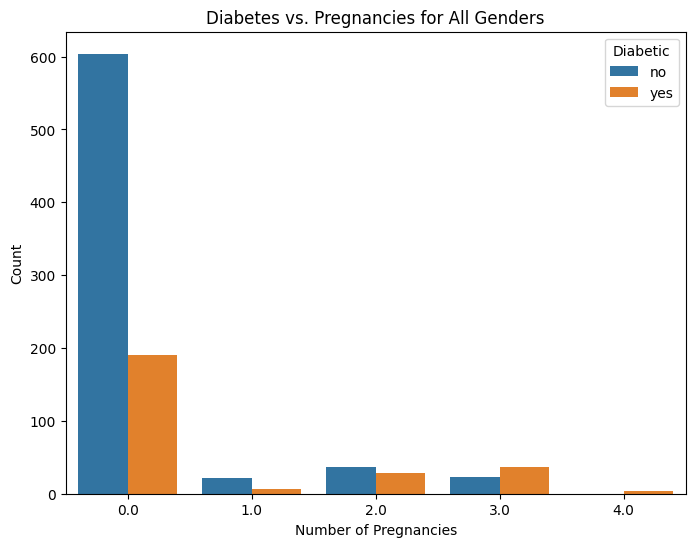

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', hue='Diabetic', data=df)
plt.title('Diabetes vs. Pregnancies for All Genders')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')

plt.legend(title='Diabetic', loc='upper right')
plt.show()

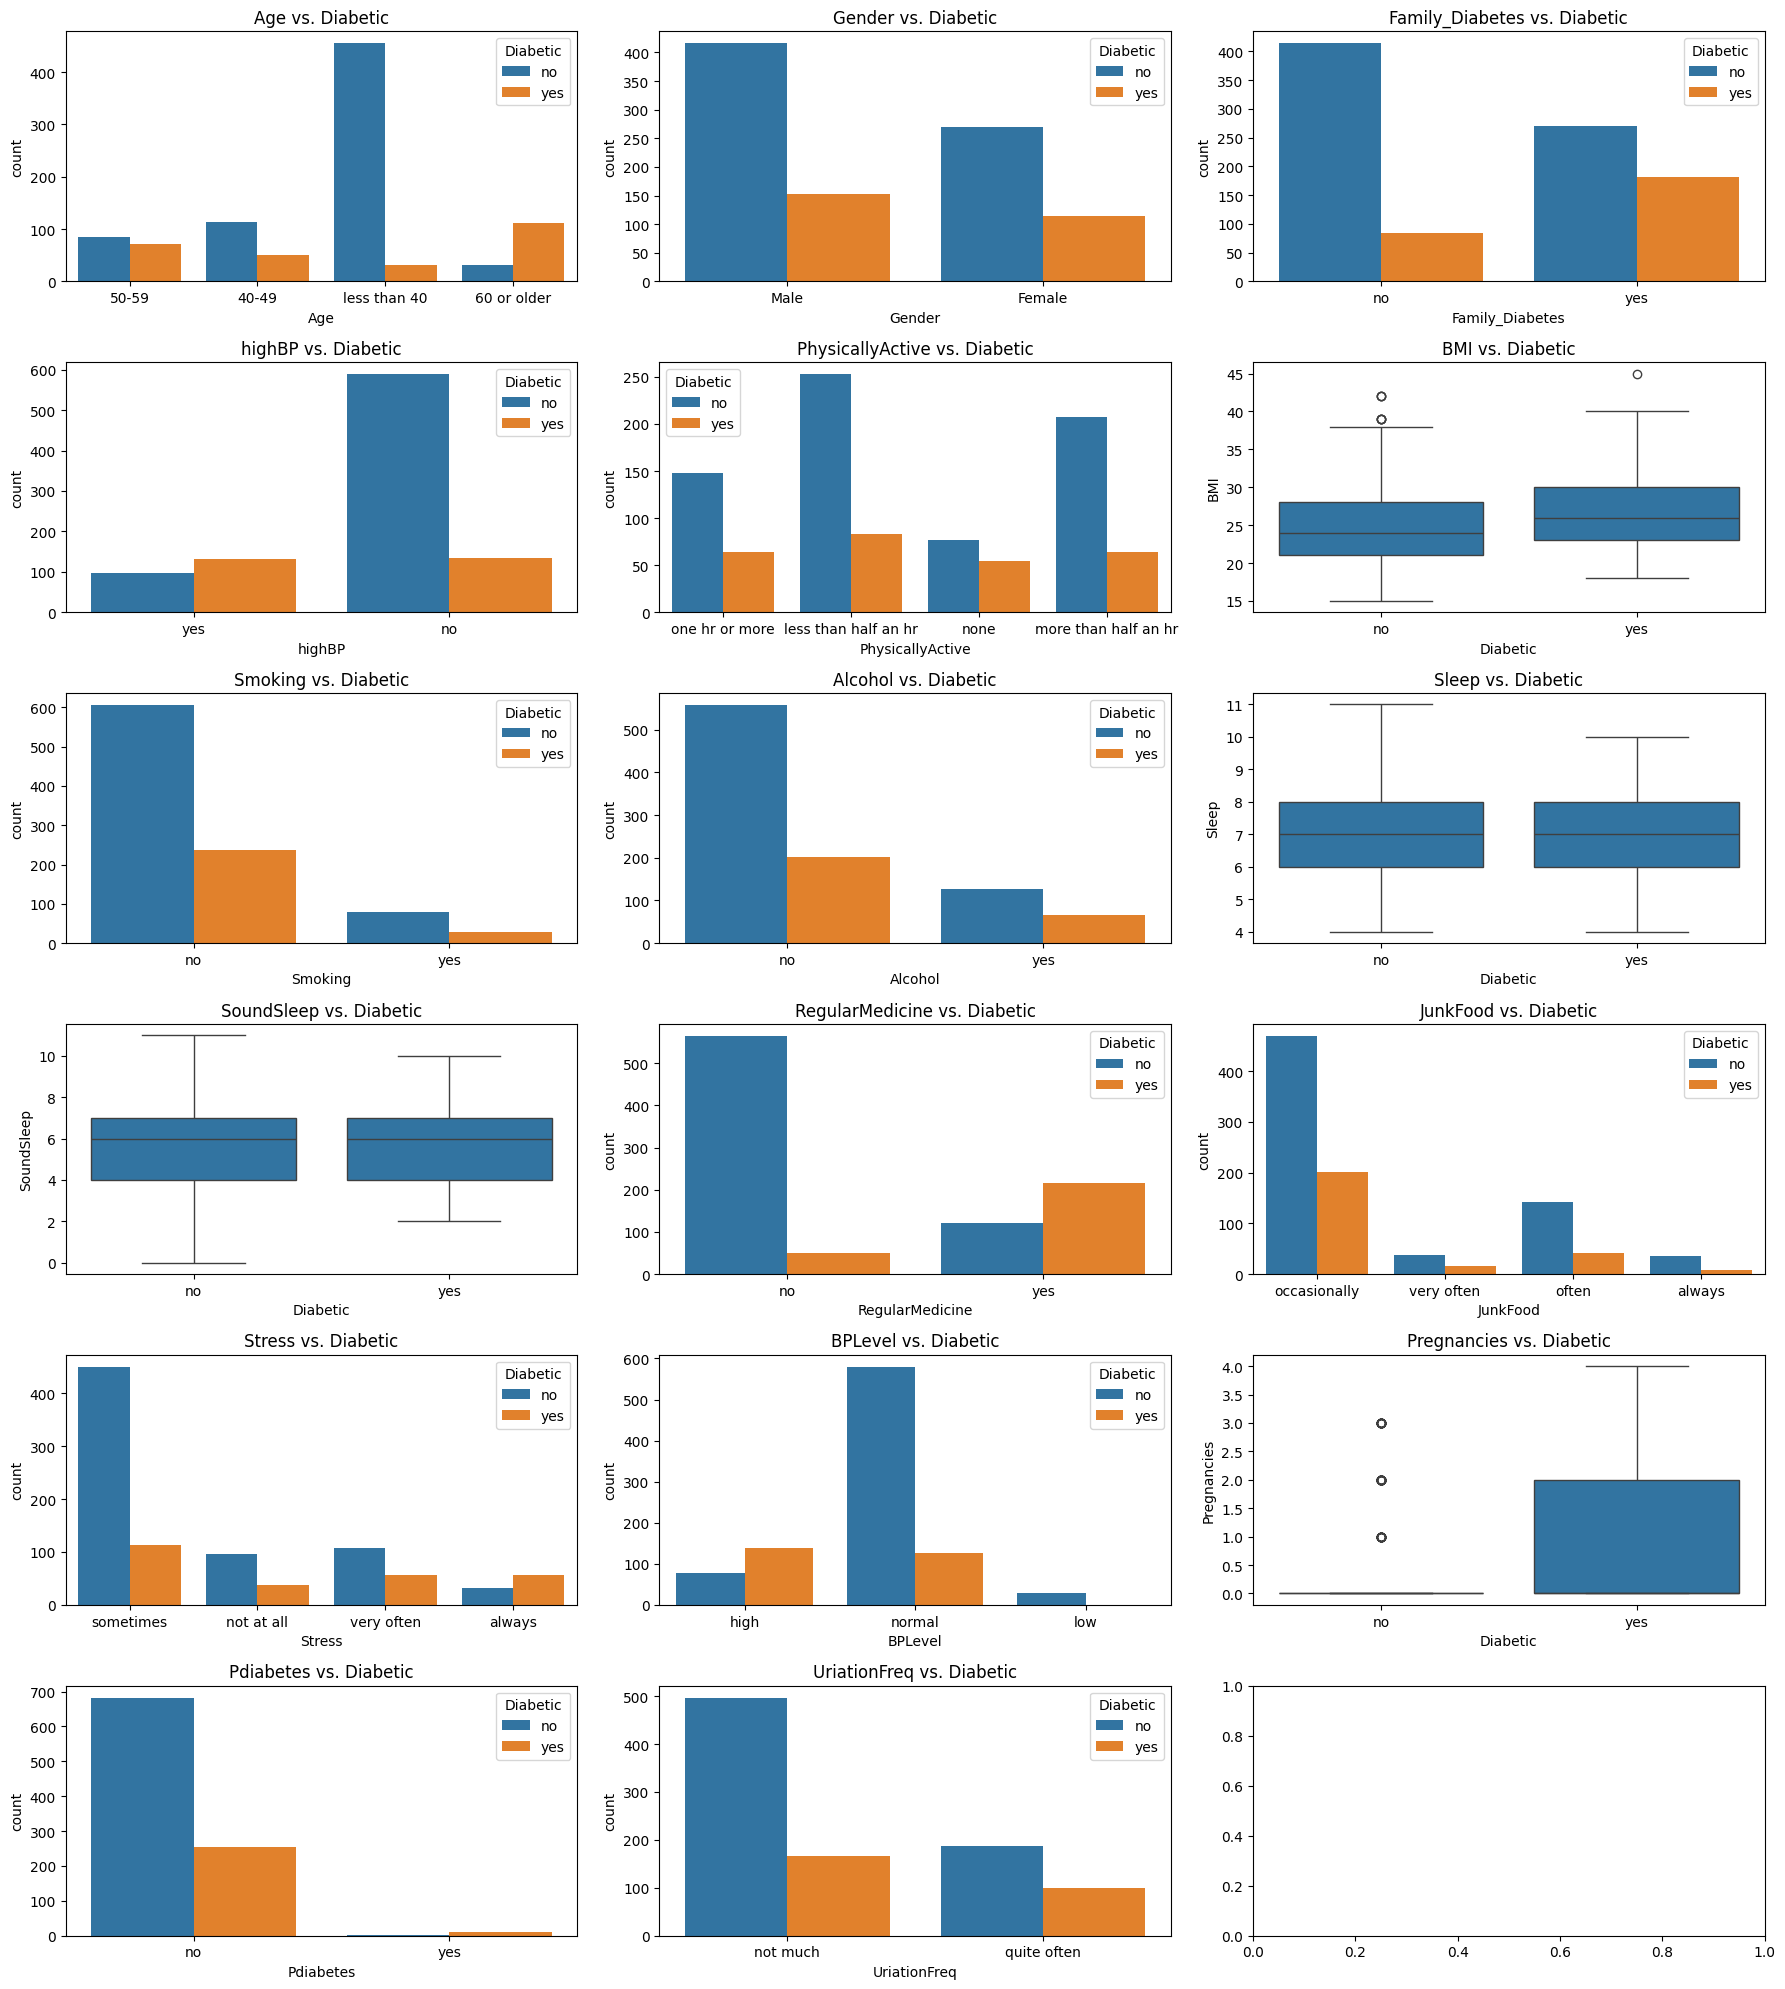

In [37]:
columns_to_plot = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
                   'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
                   'JunkFood', 'Stress', 'BPLevel', 'Pregnancies', 'Pdiabetes',
                   'UriationFreq', 'Diabetic']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate through each column and create plots
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    
    if column != 'Diabetic':  # Skip plotting the target column against itself
        if df[column].dtype == 'object':  # Categorical column
            sns.countplot(x=column, hue='Diabetic', data=df, ax=axes[row, col])
        else:  # Numerical column
            sns.boxplot(x='Diabetic', y=column, data=df, ax=axes[row, col])
        
        axes[row, col].set_title(f'{column} vs. Diabetic')

# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()


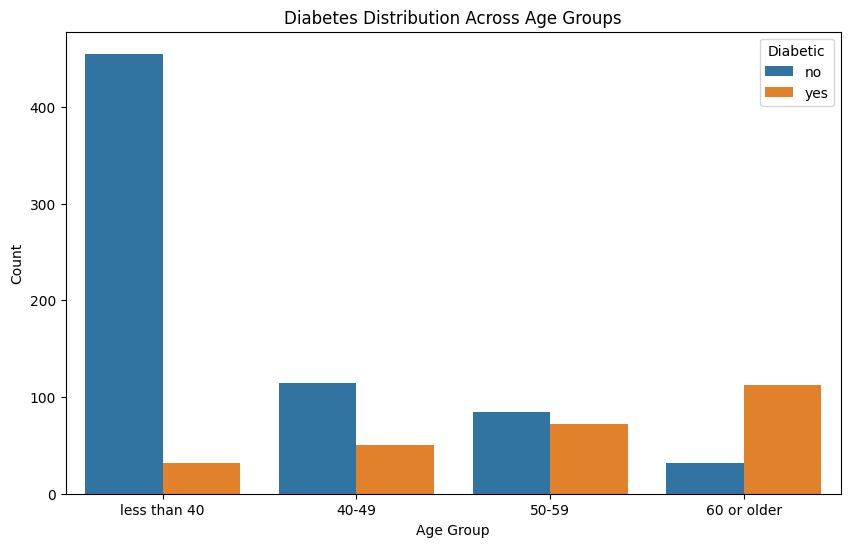

In [44]:
age_order = ['less than 40', '40-49', '50-59', '60 or older']

# Ensure the 'Age' column is treated as a categorical variable with the specified order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Diabetic', data=df, order=age_order)
plt.title('Diabetes Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetic', loc='upper right')
plt.show()

### Visualize importance

C:\Users\spilk\AppData\Local\Temp\ipykernel_26280\1693006354.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_5_features, palette=colors)


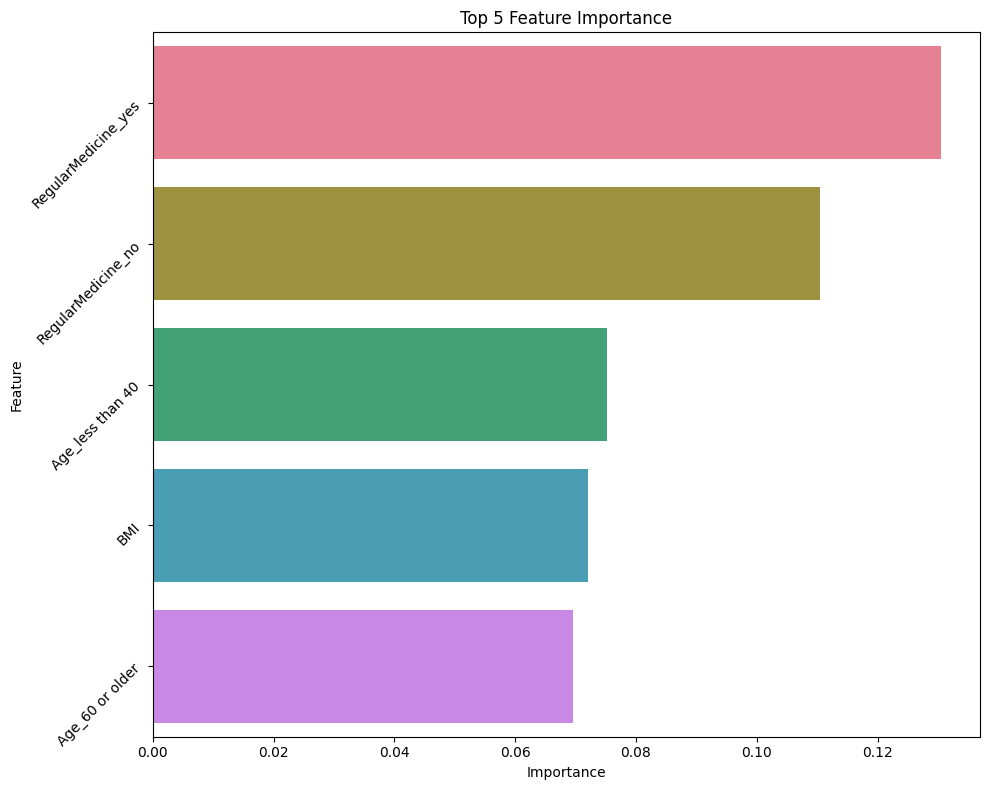

In [65]:
categorical_cols = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pdiabetes',
       'UriationFreq']

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Apply OneHotEncoder to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Train-test split if necessary
# Split your data into training and testing sets

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_encoded, y)

# Extract feature importances
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
top_5_features = feature_importance_df.head(5)

# Plot feature importance with improved y-axis readability for the top 5 features
# Define a color palette with 5 distinct colors
colors = sns.color_palette('husl', 5)

# Plot feature importance with different colors for the top 5 features
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette=colors)
plt.title('Top 5 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Rotate y-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent overlap of labels

plt.show()



### Train test Split

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop("Diabetic", axis=1)
y = df["Diabetic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer




num_transformer = make_pipeline(SimpleImputer(strategy="mean"),
                                StandardScaler())

cat_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                OneHotEncoder(drop="if_binary", handle_unknown='ignore'))

num_features = make_column_selector(dtype_include="number")
cat_features = make_column_selector(dtype_include="object")

preprocessor = make_column_transformer((num_transformer, num_features), 
                                       (cat_transformer, cat_features))


classifiers = [LogisticRegression(max_iter=1000),
               DecisionTreeClassifier(),
               RandomForestClassifier(n_jobs=-1),
               SVC(),
               KNeighborsClassifier()]


for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="accuracy")
    grid.fit(X_train, y_train)
    
   # print(f"Best Cross fold score {classifier}: {grid.best_score_}")
    print(f"Best Cross fold score {classifier}: {grid.best_score_*100: .2f}%")
    print("")


Best Cross fold score LogisticRegression(max_iter=1000):  89.48%

Best Cross fold score DecisionTreeClassifier():  93.97%

Best Cross fold score RandomForestClassifier(n_jobs=-1):  94.39%

Best Cross fold score SVC():  92.29%

Best Cross fold score KNeighborsClassifier():  85.97%



### Picking DecisionTree and RandomForest  to train

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

Best Score from folds: 0.9495223086772382
Best params: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 50, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__splitter': 'best'}
Accuracy: 0.9775596072931276


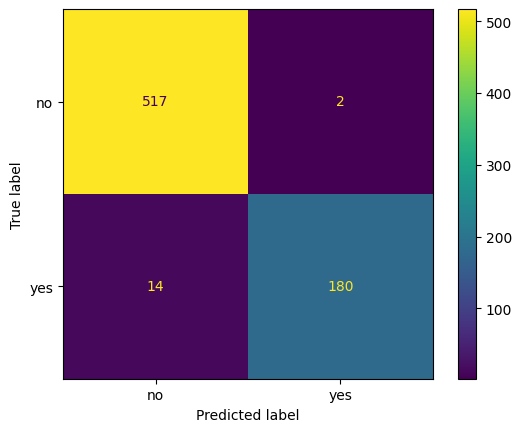

In [36]:
param_grid_dt = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_depth': [None, 10, 50],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

classifier_dt = DecisionTreeClassifier()
pipe_dt = make_pipeline(preprocessor, classifier_dt)

grid_dt = GridSearchCV(estimator=pipe_dt, param_grid=param_grid_dt, cv=5, scoring="accuracy")

grid_dt.fit(X_train, y_train)

print(f"Best Score from folds: {grid_dt.best_score_}")
print(f"Best params: {grid_dt.best_params_}")

print(f"Accuracy: {accuracy_score(y_train, grid_dt.predict(X_train))}")
ConfusionMatrixDisplay.from_estimator(grid_dt, X_train, y_train)
plt.show()


Best Score from folds: 0.9481138579730128
Best params: {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 100}
Accuracy: 0.9775596072931276


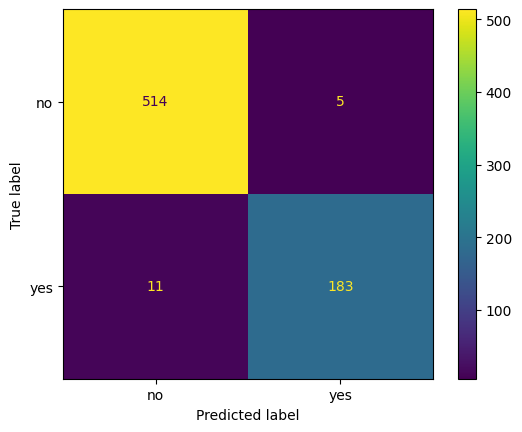

In [38]:
param_grid_rf = {
    'randomforestclassifier__n_estimators':[100, 150, 200],
    'randomforestclassifier__min_samples_leaf':[1, 2, 4],
    'randomforestclassifier__max_depth':[None, 10, 50],
    
    
}

classifier = RandomForestClassifier(n_jobs=-1)
pipe = make_pipeline(preprocessor, classifier)

grid_rf = GridSearchCV(estimator=pipe, param_grid=param_grid_rf, cv=5, scoring="accuracy")

grid_rf.fit(X_train, y_train)

print(f"Best Score from folds: {grid_rf.best_score_}")
print(f"Best params: {grid_rf.best_params_}")

print(f"Accuracy: {accuracy_score(y_train, grid_rf.predict(X_train))}")
ConfusionMatrixDisplay.from_estimator(grid_rf ,X_train, y_train)
plt.show()

Decision Tree Metrics on Training Data:
Precision: 0.989010989010989
Recall: 0.9278350515463918
F1-Score: 0.9574468085106383
AUC-ROC: 0.9980632858590073

Random Forest Metrics on Training Data:
Precision: 0.973404255319149
Recall: 0.9432989690721649
F1-Score: 0.9581151832460733
AUC-ROC: 0.9980632858590072


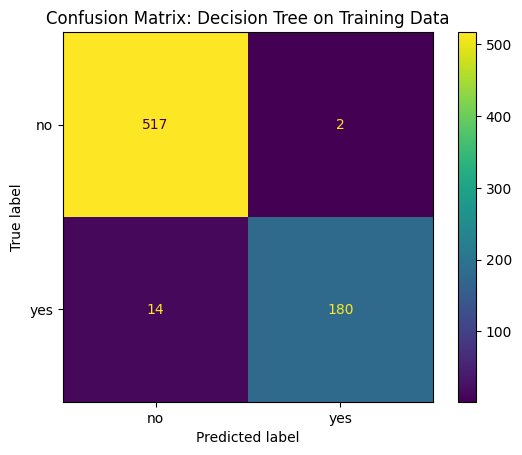

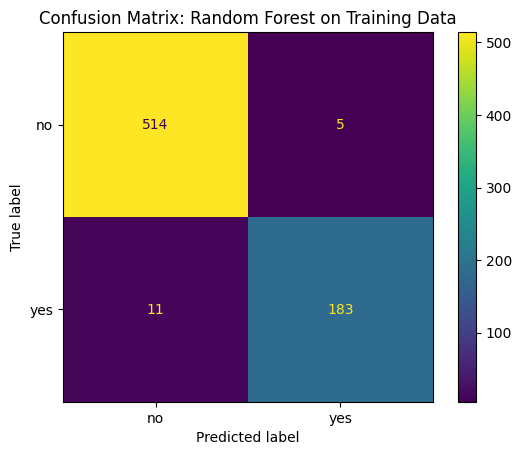

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the training data
y_train_pred_dt = grid_dt.predict(X_train)
y_train_pred_rf = grid_rf.predict(X_train)

# Decision Tree Metrics on Training Data
precision_dt_train = precision_score(y_train, y_train_pred_dt, pos_label='yes')
recall_dt_train = recall_score(y_train, y_train_pred_dt, pos_label='yes')
f1_dt_train = f1_score(y_train, y_train_pred_dt, pos_label='yes')
auc_roc_dt_train = roc_auc_score(y_train.map({'no': 0, 'yes': 1}), grid_dt.predict_proba(X_train)[:, 1])

# Random Forest Metrics on Training Data
precision_rf_train = precision_score(y_train, y_train_pred_rf, pos_label='yes')
recall_rf_train = recall_score(y_train, y_train_pred_rf, pos_label='yes')
f1_rf_train = f1_score(y_train, y_train_pred_rf, pos_label='yes')
auc_roc_rf_train = roc_auc_score(y_train.map({'no': 0, 'yes': 1}), grid_rf.predict_proba(X_train)[:, 1])

# Display the metrics
print("Decision Tree Metrics on Training Data:")
print(f"Precision: {precision_dt_train}")
print(f"Recall: {recall_dt_train}")
print(f"F1-Score: {f1_dt_train}")
print(f"AUC-ROC: {auc_roc_dt_train}\n")

print("Random Forest Metrics on Training Data:")
print(f"Precision: {precision_rf_train}")
print(f"Recall: {recall_rf_train}")
print(f"F1-Score: {f1_rf_train}")
print(f"AUC-ROC: {auc_roc_rf_train}")

# Confusion Matrix for Decision Tree on Training Data
cm_dt_train = confusion_matrix(y_train, y_train_pred_dt, labels=['no', 'yes'])
disp_dt_train = ConfusionMatrixDisplay(confusion_matrix=cm_dt_train, display_labels=['no', 'yes'])
disp_dt_train.plot()
plt.title("Confusion Matrix: Decision Tree on Training Data")
plt.show()

# Confusion Matrix for Random Forest on Training Data
cm_rf_train = confusion_matrix(y_train, y_train_pred_rf, labels=['no', 'yes'])
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train, display_labels=['no', 'yes'])
disp_rf_train.plot()
plt.title("Confusion Matrix: Random Forest on Training Data")
plt.show()


### Cross validation

In [39]:
from sklearn.model_selection import cross_val_score


import time


start_time = time.time()


cv_scores = cross_val_score(grid_dt, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')
print("")


end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Cross-validation scores: [0.96335079 0.93684211 0.95263158 0.96842105 0.98421053]
Mean cross-validation score: 0.9610912096996417

Elapsed time: 71.31447553634644 seconds


In [40]:

start_time = time.time()


cv_scores = cross_val_score(grid_rf, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')
print("")


end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Cross-validation scores: [0.97382199 0.93684211 0.95789474 0.97368421 0.97368421]
Mean cross-validation score: 0.9631854505373381

Elapsed time: 206.29915356636047 seconds


# Testing

We are going to stick with RandomForestClassifier because we had less FP in the training than DecissionTree

Accuracy: 0.9747899159663865
With parameters {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 100}



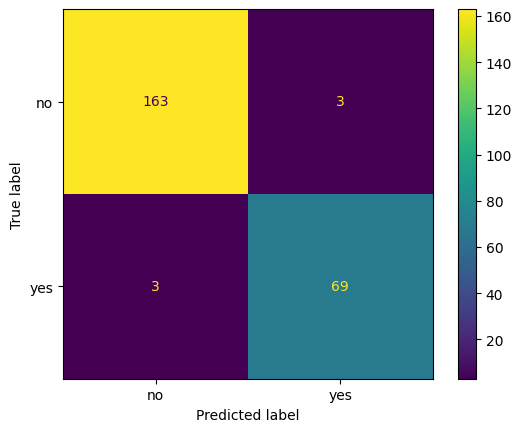

In [41]:
y_pred = grid_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
params = grid_rf.best_params_
    
print(f"Accuracy: {accuracy}")
print(f"With parameters {params}\n")
ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test)
plt.show()

In [48]:
class_distribution = df['Diabetic'].value_counts(normalize=True)
print(class_distribution)

Diabetic
no     0.720294
yes    0.279706
Name: proportion, dtype: float64


In [66]:
from sklearn.dummy import DummyClassifier

# 1. Define Baseline (e.g., most frequent class)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
baseline_pred = dummy_clf.predict(X_test)


baseline_accuracy = accuracy_score(y_test, baseline_pred)
print("Baseline Accuracy:", baseline_accuracy)
print("")

# 2. Train Final Models (using best hyperparameters)
final_dt_model = grid_dt.best_estimator_
final_rf_model = grid_rf.best_estimator_

# 3. Evaluate Final Models on Test Data
dt_test_pred = final_dt_model.predict(X_test)
rf_test_pred = final_rf_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_test_pred)
rf_accuracy = accuracy_score(y_test, rf_test_pred)

print("Decision Tree Accuracy on Test Data:", dt_accuracy)
print("Random Forest Accuracy on Test Data:", rf_accuracy)
print("")

# 4. Compare with Baseline
print("Improvement over Baseline (Decision Tree):", dt_accuracy - baseline_accuracy)
print("Improvement over Baseline (Random Forest):", rf_accuracy - baseline_accuracy)


Baseline Accuracy: 0.6974789915966386

Decision Tree Accuracy on Test Data: 0.9747899159663865
Random Forest Accuracy on Test Data: 0.9747899159663865

Improvement over Baseline (Decision Tree): 0.2773109243697479
Improvement over Baseline (Random Forest): 0.2773109243697479


In [ ]:
# Both outperform the baseline, with an improvement of approximately 27.7% in accuracy over the baseline accuracy.

#  The baseline model, which simply predicts the most frequent class, achieves an accuracy 
# of approximately 69.75% on the test data.

#  Both the Decision Tree and Random Forest models achieve very high accuracies of 
# approximately 97.48% on the test data.

In [67]:
df.columns


Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregnancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

Decision Tree Metrics:
Precision: 0.9714285714285714
Recall: 0.9444444444444444
F1-Score: 0.9577464788732394
AUC-ROC: 0.9747740963855422
Random Forest Metrics:
Precision: 0.9583333333333334
Recall: 0.9583333333333334
F1-Score: 0.9583333333333334
AUC-ROC: 0.986320281124498


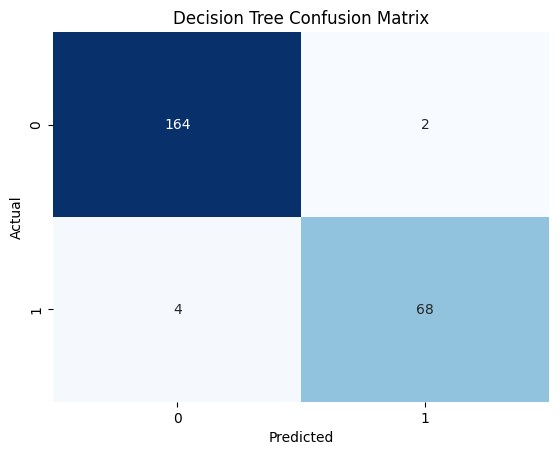

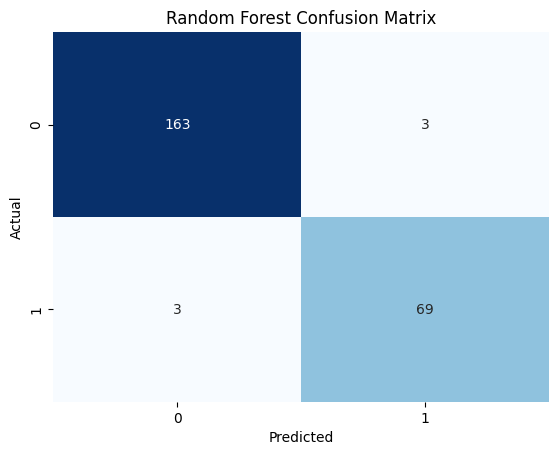

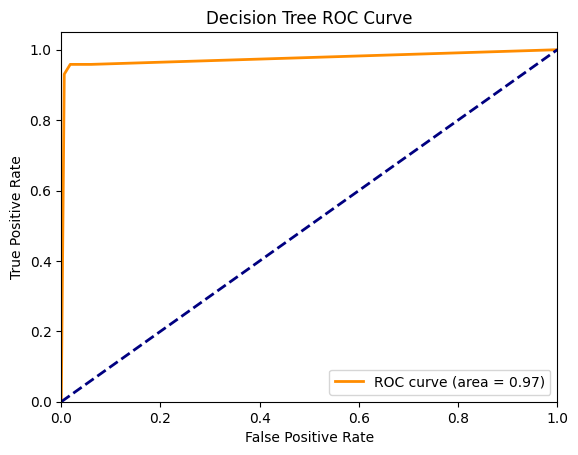

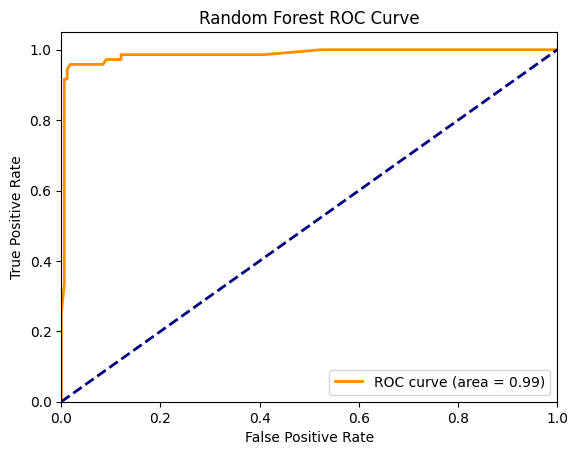

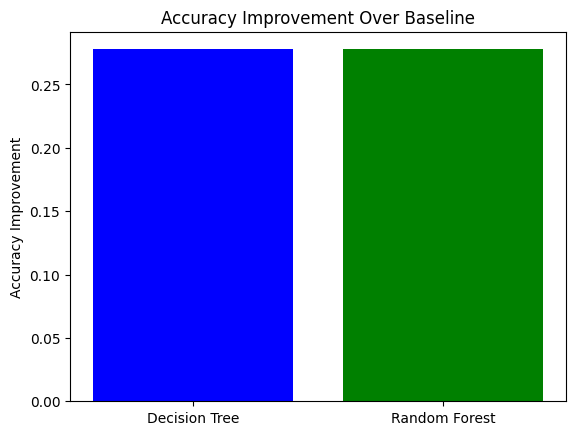

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score
from sklearn.metrics importrecall_score, f1_score, roc_auc_score, accuracy_score

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label='yes')
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Bar Plot of Accuracy Improvements
def plot_accuracy_improvement(baseline_acc, dt_acc, rf_acc):
    improvements = [dt_acc - baseline_acc, rf_acc - baseline_acc]
    models = ['Decision Tree', 'Random Forest']
    plt.bar(models, improvements, color=['blue', 'green'])
    plt.title('Accuracy Improvement Over Baseline')
    plt.ylabel('Accuracy Improvement')
    plt.show()

# Evaluate models
y_pred_dt = grid_dt.predict(X_test)
y_proba_dt = grid_dt.predict_proba(X_test)[:, 1]

y_pred_rf = grid_rf.predict(X_test)
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]

# Calculate metrics for Decision Tree
precision_dt = precision_score(y_test, y_pred_dt, pos_label='yes')
recall_dt = recall_score(y_test, y_pred_dt, pos_label='yes')
f1_dt = f1_score(y_test, y_pred_dt, pos_label='yes')
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

# Calculate metrics for Random Forest
precision_rf = precision_score(y_test, y_pred_rf, pos_label='yes')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='yes')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='yes')
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

# Display results
print("Decision Tree Metrics:")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_dt}")
print(f"AUC-ROC: {roc_auc_dt}")

print("Random Forest Metrics:")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print(f"AUC-ROC: {roc_auc_rf}")

# Plot Confusion Matrices
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

# Plot ROC Curves
plot_roc_curve(y_test, y_proba_dt, "Decision Tree ROC Curve")
plot_roc_curve(y_test, y_proba_rf, "Random Forest ROC Curve")

# Plot Accuracy Improvement
baseline_accuracy = 0.697  # The baseline accuracy value you mentioned
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
plot_accuracy_improvement(baseline_accuracy, accuracy_dt, accuracy_rf)
